In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("BIKES/서울특별시 공공자전거 대여정보_201906_1.csv",encoding='cp949')

In [3]:
bikes=pd.DataFrame()
for i in range(3):
    bikes_temp = pd.read_csv(f"BIKES/서울특별시 공공자전거 대여정보_201906_{i+1}.csv",encoding='cp949')
    bikes=pd.concat([bikes,bikes_temp])

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215632 entries, 0 to 615720
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 202.8+ MB


In [5]:
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [6]:
bikes.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06
mean,1.226154e+03,7.014750e+00,1.228354e+03,6.967391e+00,2.716998e+01,3.912916e+03
std,8.499197e+02,5.244626e+00,8.462296e+02,5.238154e+00,2.908119e+01,5.145471e+03
min,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.050000e+02,3.000000e+00,5.120000e+02,3.000000e+00,8.000000e+00,1.220000e+03
50%,1.159000e+03,6.000000e+00,1.159000e+03,6.000000e+00,1.700000e+01,2.270000e+03
75%,1.846000e+03,1.000000e+01,1.839000e+03,1.000000e+01,3.700000e+01,4.670000e+03
max,9.998000e+03,4.000000e+01,9.998000e+03,4.000000e+01,3.133000e+03,2.323100e+05


In [7]:
bikes['대여일시']=bikes['대여일시'].astype('datetime64[ms]')

In [8]:
bikes['대여일시'].dt.dayofweek
#bikes['대여일시'].dt.year  #month day hour존재

0         0
1         0
2         2
3         2
4         0
         ..
615716    0
615717    1
615718    2
615719    3
615720    4
Name: 대여일시, Length: 2215632, dtype: int32

In [9]:
#apply는 함수를 적용하는건데 lamda를 이용하면 간단히 가능

In [10]:
요일 =['월','화','수','목','금','토','일']

bikes['요일']=bikes['대여일시'].dt.dayofweek.apply(lambda x :요일[x])

In [11]:
bike_shop=pd.read_excel("공공자전거 대여소 정보2306기준.xlsx")

In [12]:
bike_shop.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,LCD,QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR


In [13]:
bike_gu=bike_shop[['자치구','대여소번호','보관소(대여소)명','위도','경도']]

In [14]:
bike_gu=bike_gu.rename(columns={'보관소(대여소)명' : '대여소명'})

In [15]:
bike_gu.head()

,자치구,대여소번호,대여소명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451
1,종로구,302,경복궁역 4번출구 뒤,37.575947,126.974060
2,종로구,303,광화문역 1번출구 앞,37.571770,126.974663
3,종로구,305,종로구청 옆,37.572559,126.978332
4,종로구,307,서울역사박물관 앞,37.570000,126.971100


In [16]:
bikes=pd.merge(bikes,bike_gu,left_on='대여 대여소번호',right_on='대여소번호')
#겹치는 컬럼 없애기

In [17]:
#대여소번호, 대여소명 열 삭제
bikes.drop(['대여소번호','대여소명'],axis=1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506
1,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수,동대문구,37.561966,127.064506
2,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수,동대문구,37.561966,127.064506
3,SPB-13926,2019-06-11 08:29:37,646,장한평역 1번출구 (국민은행앞),4,2019-06-11 08:37:24,3,중랑센터,2,7,1360.0,화,동대문구,37.561966,127.064506
4,SPB-14638,2019-06-12 08:29:20,646,장한평역 1번출구 (국민은행앞),4,2019-06-12 08:35:22,3,중랑센터,2,5,1340.0,수,동대문구,37.561966,127.064506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095740,SPB-22772,2019-06-23 02:16:07,2275,염곡치안센터 건너편,1,2019-06-23 02:45:01,2409,역삼동 디오슈페리움 (우성아파트 사거리),5,25,4240.0,일,서초구,37.461494,127.049072
2095741,SPB-21883,2019-06-01 09:55:24,2275,염곡치안센터 건너편,10,2019-06-01 10:05:01,2501,서초 포레스타5단지,3,8,2050.0,토,서초구,37.461494,127.049072
2095742,SPB-09072,2019-06-11 17:59:43,2275,염곡치안센터 건너편,6,2019-06-11 18:26:30,2501,서초 포레스타5단지,7,25,1680.0,화,서초구,37.461494,127.049072
2095743,SPB-08711,2019-06-14 10:54:52,2275,염곡치안센터 건너편,1,2019-06-14 11:20:35,2510,JW타워,4,26,4010.0,금,서초구,37.461494,127.049072


In [18]:
bikes.rename(columns={'자치구':'대여구','위도':'대여점 위도','경도':'대여점 경도'})

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여소번호,대여소명,대여점 위도,대여점 경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,646,장한평역 1번출구,37.561966,127.064506
1,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수,동대문구,646,장한평역 1번출구,37.561966,127.064506
2,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수,동대문구,646,장한평역 1번출구,37.561966,127.064506
3,SPB-13926,2019-06-11 08:29:37,646,장한평역 1번출구 (국민은행앞),4,2019-06-11 08:37:24,3,중랑센터,2,7,1360.0,화,동대문구,646,장한평역 1번출구,37.561966,127.064506
4,SPB-14638,2019-06-12 08:29:20,646,장한평역 1번출구 (국민은행앞),4,2019-06-12 08:35:22,3,중랑센터,2,5,1340.0,수,동대문구,646,장한평역 1번출구,37.561966,127.064506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095740,SPB-22772,2019-06-23 02:16:07,2275,염곡치안센터 건너편,1,2019-06-23 02:45:01,2409,역삼동 디오슈페리움 (우성아파트 사거리),5,25,4240.0,일,서초구,2275,염곡치안센터 건너편,37.461494,127.049072
2095741,SPB-21883,2019-06-01 09:55:24,2275,염곡치안센터 건너편,10,2019-06-01 10:05:01,2501,서초 포레스타5단지,3,8,2050.0,토,서초구,2275,염곡치안센터 건너편,37.461494,127.049072
2095742,SPB-09072,2019-06-11 17:59:43,2275,염곡치안센터 건너편,6,2019-06-11 18:26:30,2501,서초 포레스타5단지,7,25,1680.0,화,서초구,2275,염곡치안센터 건너편,37.461494,127.049072
2095743,SPB-08711,2019-06-14 10:54:52,2275,염곡치안센터 건너편,1,2019-06-14 11:20:35,2510,JW타워,4,26,4010.0,금,서초구,2275,염곡치안센터 건너편,37.461494,127.049072


### 대여시간대별, 요일별 대여 건수 분석
* pivot_table이용

In [19]:
bikes['대여시간대']=bikes['대여일시'].dt.hour

In [20]:
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대',columns='요일',values='자전거번호',aggfunc='count')

#어떤값을 index로 어떤값을 열로 어떤값을 값으로 그값의 어떤것(ex)count)를 이용

In [21]:
bikes.pivot_table(index='대여시간대',columns='요일',values='이용시간',aggfunc=['count','mean'])

count                                                 mean             \
요일         금      목      수      월      일      토      화          금          목   
대여시간대                                                                          
0       7903   9022   8187   7072  16097  12761   9345  22.464760  21.729550   
1       6341   7116   6832   4580  11099  10591   7135  22.493298  22.205593   
2       4506   5548   5030   3117   8387   7977   4278  21.797825  22.160238   
3       2870   3797   3262   1996   8339   5885   2968  22.026481  21.355280   
4       1874   2283   2044   1456   3870   3406   1878  22.088047  21.357862   
5       1937   2313   2351   1956   2424   2485   2208  21.191017  20.907479   
6       4013   4269   5076   4212   3116   3161   4368  18.445801  19.600843   
7       9732  10744  13057  10771   4168   4604  11432  16.694924  17.093261   
8      16242  16908  22260  17769   6266   8232  20869  14.424825  15.514608   
9       8339  10217  10888   9496   8082   9783  10796  17.748051  19.231575   
10      5913   7722   7561   7001   9659  10780   7492  21.749197  24.360917   
11      6655   8781   8710   7943  11366  12745   8293  24.372953  26.042820   
12      7839  10027   9573   9346  13938  15028   9488  22.330527  24.868355   
13      9123  10482   9750   9362  16208  16927   9470  24.095911  25.997520   
14     10198  10208   9980   9678  17915  18227   9193  26.629045  25.364420   
15     11555   9000  11247  10945  20725  20620   8761  27.932497  26.692889   
16     14764  11668  14114  13753  23329  23189  12021  27.717150  26.951663   
17     21917  16938  20187  21435  25026  25886  19722  27.111420  26.755461   
18     31406  27573  33206  37041  25976  24546  32522  26.748297  26.571392   
19     21263  18644  23801  27484  26541  25398  21180  28.385976  29.105342   
20     18639  16827  20706  24137  25579  25500  17650  31.050915  31.203720   
21     18719  16316  20161  22194  22413  25694  17024  31.207169  30.300625   
22     18210  14383  18285  19182  17720  23090  15481  28.065019  26.557603   
23     12354  10150  11906  12450  12764  18445  10406  25.081269  24.657833   

                                                              
요일             수          월          일          토          화  
대여시간대                                                         
0      20.745694  24.745617  26.953035  22.887391  22.243981  
1      21.181060  24.652183  25.230561  23.398546  21.488297  
2      22.150099  23.749439  24.107190  22.390874  21.225105  
3      20.981913  22.973948  22.876364  21.670008  22.103437  
4      19.904110  21.773352  22.248320  20.301820  19.772630  
5      20.367929  20.323620  22.992162  21.083300  21.881341  
6      18.990544  18.458689  25.876765  23.376147  18.600733  
7      16.504710  16.275926  29.002879  23.302780  16.519332  
8      14.431536  14.427036  24.934248  21.825437  14.489482  
9      17.622337  17.420809  25.256496  23.536543  17.752223  
10     22.294538  21.794029  27.981675  25.841651  21.889215  
11     24.172101  24.381468  29.874186  26.639153  24.499940  
12     23.083673  23.936550  29.412111  27.771094  23.317243  
13     24.044615  24.193976  32.168374  29.346074  23.745935  
14     25.981062  26.319281  34.930449  32.532178  24.940063  
15     27.165200  28.139973  35.843812  35.204753  26.490926  
16     26.819541  27.846942  35.993956  36.577731  26.438566  
17     25.645911  27.749802  35.482858  35.812447  26.828618  
18     26.146329  27.834751  35.232522  35.954290  26.274583  
19     27.535986  29.873999  35.793602  38.096386  28.766289  
20     29.890805  32.570949  35.408460  38.385216  32.232011  
21     28.778086  30.911057  32.516084  35.652020  29.924107  
22     25.564069  26.811698  28.500677  31.503032  26.576836  
23     23.944482  24.713092  25.689439  28.620005  23.163079

<Axes: title={'center': '대여시간 X 요일 이용건수'}, xlabel='대여시간대'>

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args,

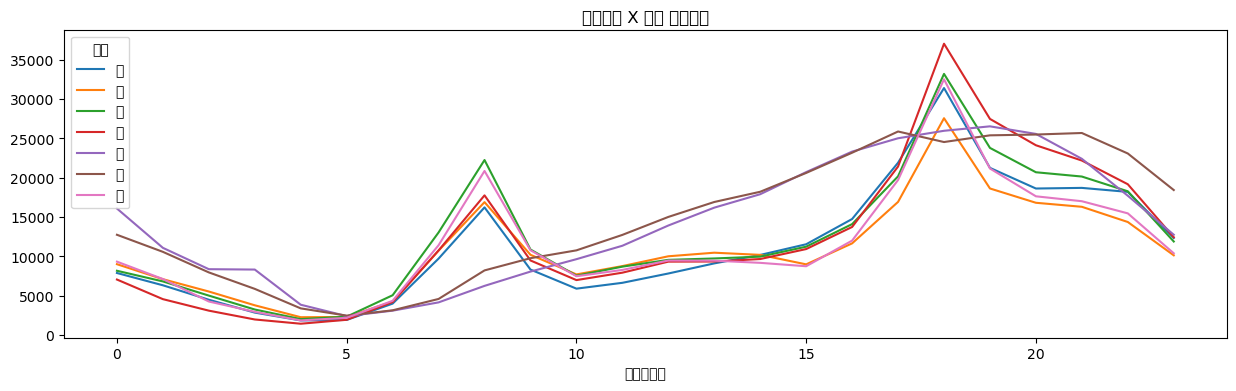

In [22]:
hourly_dayofweek_ride.plot(kind='line',title='대여시간 X 요일 이용건수',figsize=(15,4),rot=0)

#rot이 있으면 가로축 숫자값이 똑바로 세워짐

<Axes: title={'center': '대여시간 X 요일 이용건수'}, xlabel='대여시간대'>

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args,

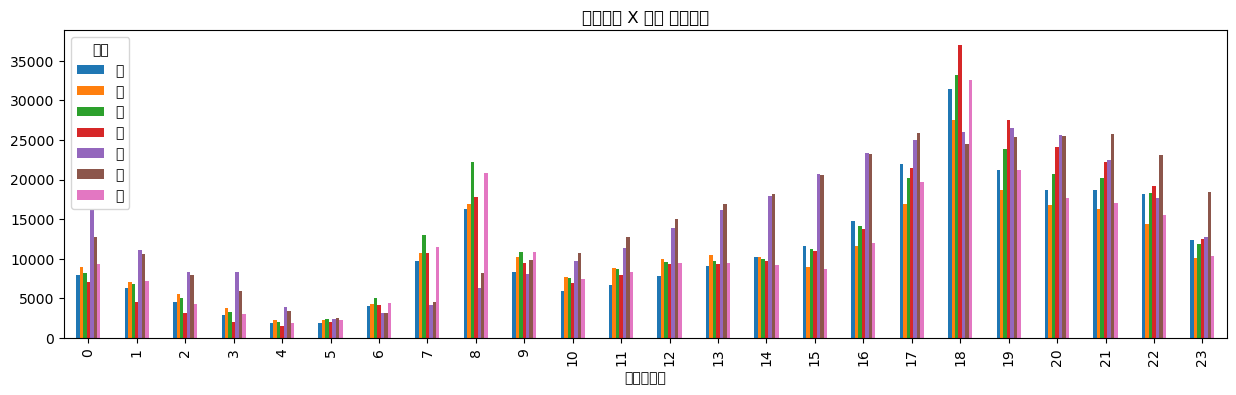

In [23]:
hourly_dayofweek_ride.plot(kind='bar',title='대여시간 X 요일 이용건수',figsize=(15,4))
#rot이 x축같은데?

<Axes: xlabel='요일', ylabel='count'>

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*ar

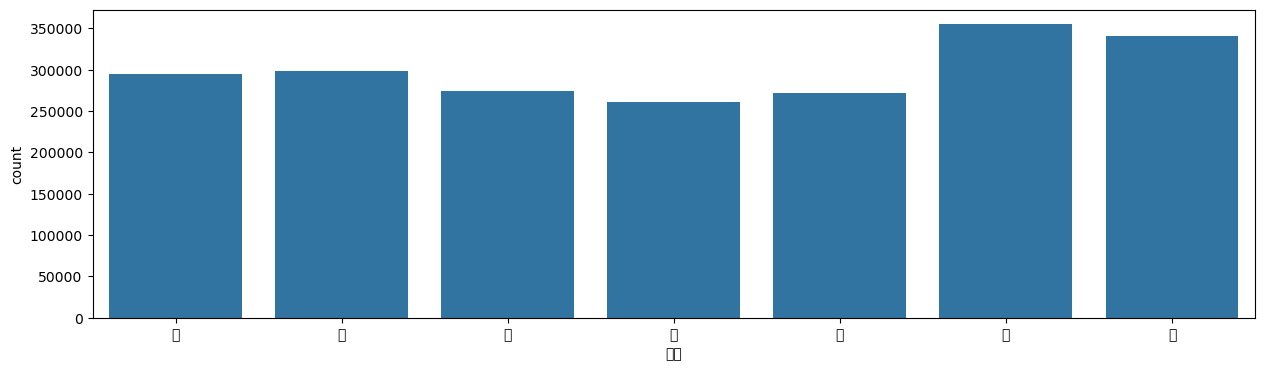

In [26]:
#counterplot(value_counts를 안써도 이거할때 됨)
#value_counts를 직관적으로 본다고 생각해도됨
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

sns.countplot(data=bikes,x='요일')

<Axes: xlabel='일자', ylabel='count'>

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


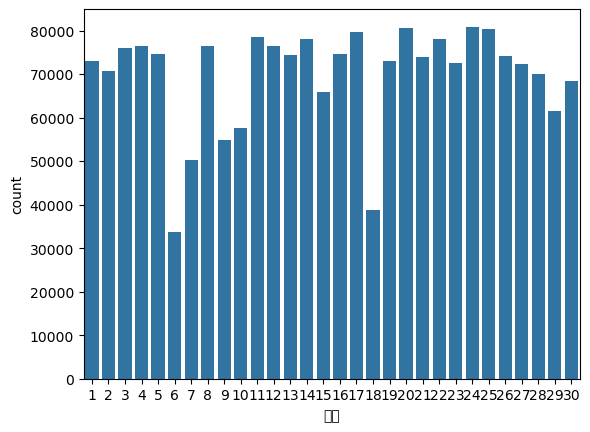

In [29]:
bikes['일자']=bikes['대여일시'].dt.day
sns.countplot(data=bikes,x='일자')

<Axes: xlabel='대여시간대', ylabel='count'>

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing fr

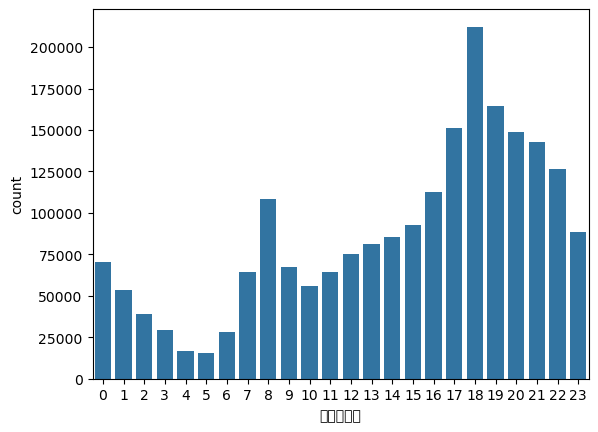

In [30]:
sns.countplot(data=bikes,x='대여시간대')

/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn

<Axes: xlabel='요일', ylabel='대여시간대'>

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*arg

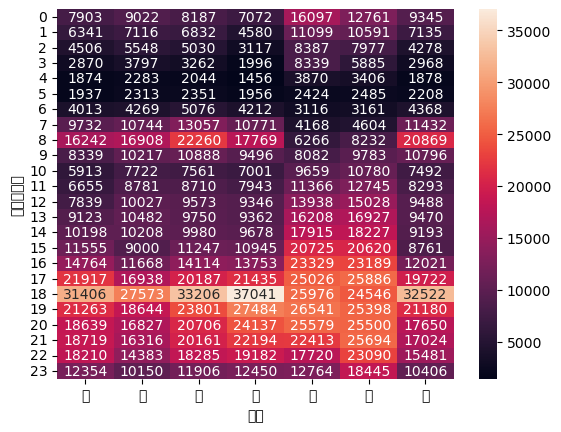

In [31]:
sns.heatmap(data=hourly_dayofweek_ride,annot=True,fmt='d')